In [1]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn import metrics
from hdbscan import HDBSCAN
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading datasets
def load_datasets():
    datasetA, metaA = arff.loadarff(open('R15.arff','r'))
    datasetB, metaB = arff.loadarff(open('disk-1000n.arff','r'))
    datasetC, metaC = arff.loadarff(open('spiralsquare.arff','r'))
    datasetD, metaD = arff.loadarff(open('elly-2d10c13s.arff','r'))
    datasetE, metaE = arff.loadarff(open('cure-t2-4k.arff','r'))
    datasetF, metaF = arff.loadarff(open('square5.arff','r'))
    datasetG, metaG = arff.loadarff(open('rings.arff','r'))
    datasetH, metaH = arff.loadarff(open('cluto-t8-8k.arff','r'))

    return ([datasetA, datasetB, datasetC, datasetD, datasetE, datasetF, datasetG, datasetH],[metaA, metaB, metaC, metaD, metaE, metaF, metaG, metaH])

In [3]:
data, metadata = load_datasets()

In [12]:
def hdbscan_params(dataset, nb_min, nb_max, min_eps,max_eps,step_eps):
    
    s_duration_sil = []
    s_duration_db = []
    s_duration_chi = []
    
    s_sil_score = []
    s_db_score = []
    s_chi_score = []
    
    s_labels_sil = []
    s_labels_db = []
    s_labels_chi = []

    samp_eps_sil = []
    samp_eps_db = []
    samp_eps_chi = []
    
    X = [[x,y] for (x,y,c) in dataset]

    for samp in range(nb_min,nb_max):
        duration = []
        sil_score = []
        db_score = []
        chi_score = []
        dlabels = []

        for e in np.arange(min_eps,max_eps,step_eps):
            start_time = time.time()
            hdbscan = HDBSCAN(cluster_selection_epsilon=float(e), min_samples=samp).fit(X)
            elapsed = time.time() - start_time
            labels = hdbscan.labels_
            if np.unique(labels).shape[0] < 2:
                continue
            dlabels.append(labels)
            sil = metrics.silhouette_score(X, labels)
            db = metrics.davies_bouldin_score(X, labels)
            chi = metrics.calinski_harabaz_score(X, labels)
            sil_score.append(sil)
            db_score.append(db)
            chi_score.append(chi)
            duration.append(elapsed)

        if len(sil_score) < 1:
            continue
        best_eps_sil = sil_score.index(min(sil_score))
        best_eps_db = db_score.index(min(db_score))
        best_eps_chi = chi_score.index(max(chi_score))
        
        all_eps = np.arange(min_eps,max_eps,step_eps)
        
        samp_eps_sil.append(all_eps[best_eps_sil])
        samp_eps_db.append(all_eps[best_eps_db])
        samp_eps_chi.append(all_eps[best_eps_chi])
        
        s_sil_score.append(sil_score[best_eps_sil])
        s_db_score.append(db_score[best_eps_db])
        s_chi_score.append(chi_score[best_eps_chi])
        
        s_duration_sil.append(duration[best_eps_sil])
        s_duration_db.append(duration[best_eps_db])
        s_duration_chi.append(duration[best_eps_chi])

        s_labels_sil.append(dlabels[best_eps_sil])
        s_labels_db.append(dlabels[best_eps_db])
        s_labels_chi.append(dlabels[best_eps_chi])

    best_samp_sil = s_sil_score.index(min(s_sil_score)) + nb_min
    best_samp_db = s_db_score.index(min(s_db_score)) + nb_min
    best_samp_chi = s_chi_score.index(max(s_chi_score)) + nb_min
    
    best_eps_sil = samp_eps_sil[best_samp_sil-nb_min]
    best_eps_db = samp_eps_db[best_samp_db-nb_min]
    best_eps_chi = samp_eps_chi[best_samp_chi-nb_min]

    print("best with silhouette coefficient: eps=", samp_eps_sil[best_samp_sil-nb_min],"min_samples=", best_samp_sil)
    print("best with DB index: eps=",samp_eps_db[best_samp_db-nb_min],"min_samples=", best_samp_db)
    print("best with Calinski and Harabasz index: eps=",samp_eps_chi[best_samp_chi-nb_min],"min_samples=", best_samp_chi)

    plt.plot(range(nb_min,nb_max),s_sil_score,label = "silhouette coefficient")
    plt.plot(range(nb_min,nb_max),s_db_score,label = "DB index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),s_chi_score,label = "Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('score')
    plt.legend()
    plt.show()

    plt.plot(range(nb_min,nb_max),s_duration_sil,label = "Execution time - silhouette coefficient")
    plt.plot(range(nb_min,nb_max),s_duration_db,label = "Execution time - DB index")
    plt.plot(range(nb_min,nb_max),s_duration_chi,label = "Execution time - Calinski and Harabasz index")
    plt.xlabel('min samples')
    plt.ylabel('time')
    plt.legend()
    plt.show()
      
    return ((best_samp_sil,best_eps_sil,s_labels_sil[best_samp_sil-nb_min]),
            (best_samp_db,best_eps_db,s_labels_db[best_samp_db-nb_min]),
            (best_samp_chi,best_eps_chi,s_labels_chi[best_samp_chi-nb_min]))

Dataset: R15
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15')

best with silhouette coefficient: eps= 0.6 min_samples= 4
best with DB index: eps= 0.7000000000000001 min_samples= 2
best with Calinski and Harabasz index: eps= 0.1 min_samples= 2


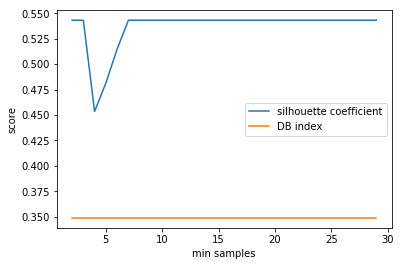

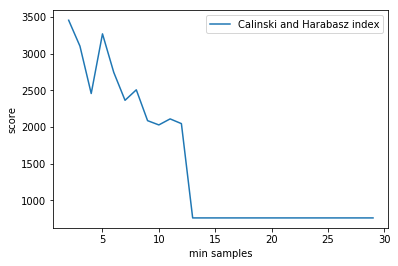

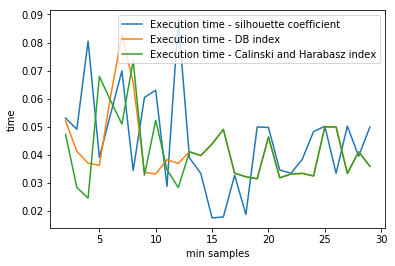

k with silhouette coefficient: 10
k with DB index: 8
k with Calinski and Harabasz index: 16


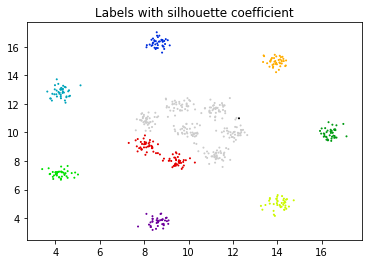

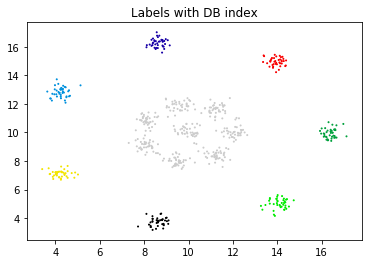

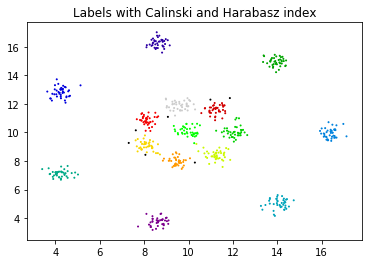

Dataset: disk-1000n
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1')

best with silhouette coefficient: eps= 1.0 min_samples= 16
best with DB index: eps= 1.0 min_samples= 11
best with Calinski and Harabasz index: eps= 1.5 min_samples= 21


ValueError: x and y must have same first dimension, but have shapes (98,) and (59,)

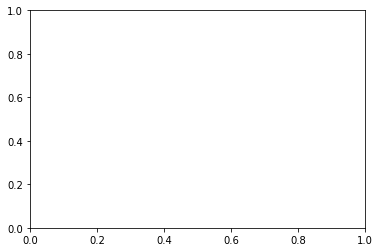

In [14]:
# parameters to try for each dataset (min_eps,max_eps,step_eps,min_nb_samples,max_nb_samples)
params = [(0.1,3.0,0.1,2,30),
          (1.0,20.0,0.5,2,100),
          (0.1,1.0,0.1,2,100),
          (0.1,1.8,0.05,2,100),
          (1.0,10.0,0.5,2,80),
          (1,20,0.5,2,100),
          (0.5,20.0,0.5,2,100),
          (1,200,10,2,100)]

for i in range(len(data)):
    dataset = data[i]
    meta = metadata[i]
    (min_eps,max_eps,step_eps,min_nb_samples,max_nb_samples) = params[i]
    print(meta)
    
    ((minpts_sil,eps_sil,best_labels_sil),
     (minpts_db,eps_db,best_labels_db),
     (minpts_chi,eps_chi,best_labels_chi)) = hdbscan_params(data[i],min_nb_samples,max_nb_samples,min_eps,max_eps,step_eps)

    print("k with silhouette coefficient:",np.unique(best_labels_sil).shape[0])
    print("k with DB index:",np.unique(best_labels_db).shape[0])
    print("k with Calinski and Harabasz index:",np.unique(best_labels_chi).shape[0])

    plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_sil,
                        s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with silhouette coefficient")
    plt.show()

    plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_db,
                        s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with DB index")
    plt.show()

    plt.scatter(dataset[meta.names()[0]],
                        dataset[meta.names()[1]],
                        c = best_labels_chi,
                        s = 1, cmap = 'nipy_spectral')
    plt.title("Labels with Calinski and Harabasz index")
    plt.show()